In [6]:
import sys
print(sys.executable)

c:\Users\RISHIVEER YADAV\AppData\Local\Programs\Python\Python39\python.exe


# Q2) Predicting Food Delivery Time
In this question we are aksed to implement linear regression and gradient descent by working on a real-world dataset on food delivery time.

In [66]:
# Imorting the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Food_Delivery_Times.csv')
print(df.isnull().sum())

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


Now we can see that the fields 'Weather', 'Traffic_Level', 'Time_of_Day' and 'Courier_Experience_yrs' are have null entires. Let us handle the missining values for each of these as follows:
1) If the field is a categorical field, we fill the misssing entries with the mode (most occuring) of the field
2) If the field is a numeric field, we fill the missing entries with the mean of the field

In [67]:
categorical_fields = ['Weather', 'Traffic_Level', 'Time_of_Day']
for column in categorical_fields:
    try:
        df[column].fillna(df[column].mode()[0], inplace=True)
    except Exception as e:
        print('There seems to be an error:',e)

df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)

# Verifying if there are any missing values
print(df.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


C:\Users\RISHIVEER YADAV\AppData\Local\Temp\ipykernel_8640\3320626411.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\RISHIVEER YADAV\AppData\Local\Temp\ipykernel_8640\3320626411.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Now we are asked to encode the necessary fields. Encoding refers to the process of converting categorical (non-numeric) values into numeric values so that their usage becomes easier in methods like linear regression. For the categorical columns 'Weather', 'Vehicle_Type' and 'Time_of_Day' we go with the One-Hot Encoding and for 'Traffic_Level' we go with Ordinal Encoding

In [68]:
# One-Hot encoding for the categorical fields 'Weather' and 'Time_of_Day'
weather_ohe = pd.get_dummies(df['Weather'], prefix='Weather')
df = pd.concat([df, weather_ohe], axis=1)
df.drop(columns=['Weather'], inplace=True)

time_of_day_ohe = pd.get_dummies(df['Time_of_Day'], prefix='Time_of_Day')
df = pd.concat([df, time_of_day_ohe], axis=1)
df.drop(columns=['Time_of_Day'], inplace=True)

vehicle_type_ohe = pd.get_dummies(df['Vehicle_Type'], prefix='Vehicle_Type')
df = pd.concat([df, vehicle_type_ohe], axis=1)
df.drop(columns=['Vehicle_Type'], inplace=True)

# Ordinal encoding for Traffic_Level
traffic_level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic_Level'] = df['Traffic_Level'].map(traffic_level_mapping)

Now let us plot the appropriate plots for each of the features. We go with histograms for numerical features. We use boxplots for outlier detection, violin plot for numerical distributions

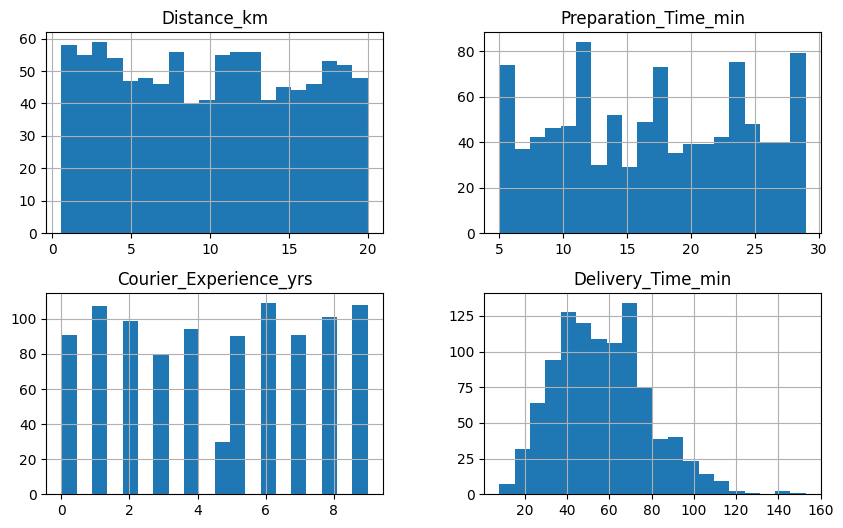

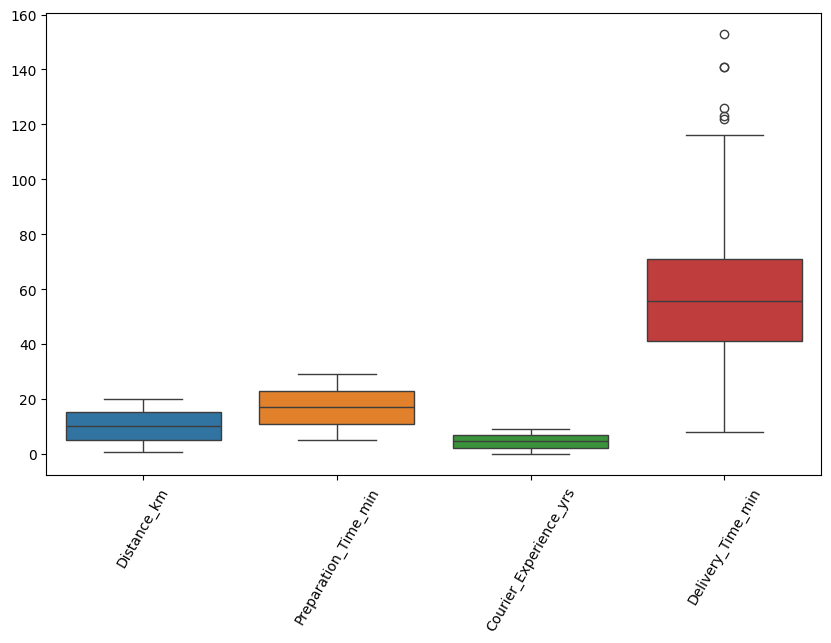

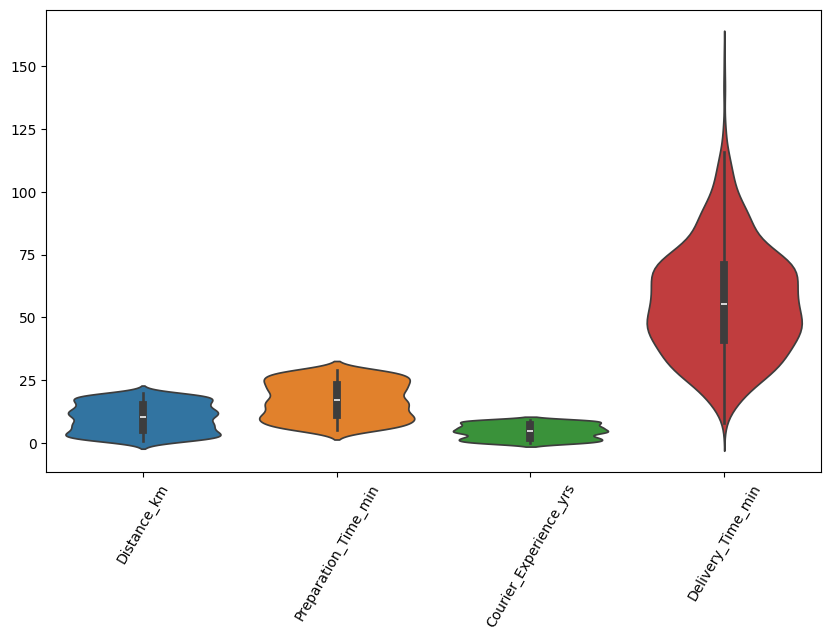

In [69]:
# Histograms for the numeric fields
numeric_fields = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs','Delivery_Time_min']
df[numeric_fields].hist(figsize=(10, 6), bins=20)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_fields])
plt.xticks(rotation=60)
plt.show()

# Violin  plots for numerical distributions
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[numeric_fields])
plt.xticks(rotation=60)
plt.show()

Now let us split the dataset into train, test and validation sets as per the proportions 70:15:15. We are also asked to scale the features. Scaling refers to the process of 'normalizing' numerical values so that they have similar ragne. This prevents some features from dominating other (example: distance in Kms vs. preparation time in minutes). In our code we use the StandardScaler for normalizing the data, wherein we subtract the mean from the value and then divide by the standard deviation. Hence, after scaling scaling, the values have mean as 0 and standard deviation as 1

In [70]:
# Splitting the dataset (70:15:15)
training_set, temp_data = train_test_split(df, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Scaling the numerical fields
scaler = StandardScaler()

training_set[numeric_fields] = scaler.fit_transform(training_set[numeric_fields])

validation_data[numeric_fields] = scaler.transform(validation_data[numeric_fields])
test_data[numeric_fields] = scaler.transform(test_data[numeric_fields])

print(training_set.head())

     Order_ID  Distance_km  Traffic_Level  Preparation_Time_min  \
541       272     1.079578              1             -0.724620   
440       224    -0.439071              1             -1.144516   
482        12     1.626855              1             -0.864585   
422       484     0.453114              1              0.115171   
778       259     0.256023              1             -1.144516   

     Courier_Experience_yrs  Delivery_Time_min  Weather_Clear  Weather_Foggy  \
541               -1.245805           1.949758          False           True   
440               -0.901081          -1.201221          False          False   
482                1.167260           0.214436          False          False   
422               -1.590528           0.442768           True          False   
778                1.167260          -1.109889           True          False   

     Weather_Rainy  Weather_Snowy  Weather_Windy  Time_of_Day_Afternoon  \
541          False          False        

## 2.1) Linear Regression with Gradient Descent
Now we are asked to implement batch, mini-batch and stochastic gradient descent from scratch.
1) Batch Gradient Descent: uses all training samples to compute gradient in each step
2) Mini-Batch Gradient Descent: uses a small batch of samples to compute gradient
3) Stochastic Gradient Descent: updates weights for each individual sample

In [ ]:
# Let us define a function to initialize the weights and biases
def initialize_weights(features, random_init=True):
    if random_init:
        np.random.seed(7)
        weights = np.random.randn(features) * 0.01
        bias = np.random.randn()
    else:
        weights = np.zeros(features)
    bias = 0
    return weights, bias

# Function to compute mean squared error
def compute_mse(true_y, pred_y):
    return np.mean((true_y - pred_y) ** 2)

# Function to compute the gradients
def compute_gradients(X, y, W, b):
    N = len(y)
    y_pred = X.dot(W) + b
    dW = (-2/N) * X.T.dot(y - y_pred)       # calculating the gradient of the loss function wrt weights
    db = (-2/N) * np.sum(y - y_pred)        # calculating the gradient of the loss function wrt bias
    return dW, db


# BATCH GRADIENT DESCENT
def batch_gradient_descent(X, y, alpha=0.05, epochs=1000):
    W, b = initialize_weights(X.shape[1])
    losses_list = []

    for i in range(epochs):
        dW, db = compute_gradients(X, y, W, b)
        W = W - alpha * dW
        b = b - alpha * db
        y_pred = X.dot(W) + b

        loss = compute_mse(y, y_pred)
        losses_list.append(loss)

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}')
    return W, b, losses_list


# MINI-BATCH GRADIENT DESCENT
def mini_batch_gradient_descent(X, y, batch_size=32, alpha=0.05, epochs=1000):
    W, b = initialize_weights(X.shape[1])
    losses_list = []

    for i in range(epochs):
        for j in range(0, len(y), batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]

            dW, db = compute_gradients(X_batch, y_batch, W, b)
            W = W - alpha * dW
            b = b - alpha * db

        y_pred = X.dot(W) + b
        loss = compute_mse(y, y_pred)
        losses_list.append(loss)

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}')
    return W, b, losses_list
    